1. Read and clean data
We start off by importing the two data sets from Denmark Statistics, statistikbanken.dk:

1. EJ56: skriv noget om huspris
2. realindkomst udvilking


We import EJ56 as API-files.

In [17]:
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`
import matplotlib.pyplot as plt

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
national = DstApi('EJ56')
tabsum = national.tablesummary(language='en')
display(tabsum)

wage = DstApi('SBLON1')
tabsumWage = wage.tablesummary(language="en")
display(tabsumWage)



Table SBLON1: Standardised index of average earnings by industry (DB07), sector, unit and time
Last update: 2024-02-29T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,BRANCHE07,51,TOT,"TOT Industry, total",S,S Other service activities etc.,False
1,SEKTOR,7,1000,All sectors,1046,Corporations and organizations,False
2,VARIA1,2,100,Index,215,Percentage change compared to the same quarter...,False
3,Tid,32,2016K1,2016Q1,2023K4,2023Q4,True


Table EJ56: Price index for sales of property by region, category of real property, unit and time
Last update: 2024-03-26T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,OMRÅDE,17,000,All Denmark,11,Province Nordjylland,False
1,EJENDOMSKATE,3,0111,One-family houses,2103,"Owner-occupied flats, total",False
2,TAL,3,100,Index,310,Percentage change compared to same quarter the...,False
3,Tid,128,1992K1,1992Q1,2023K4,2023Q4,True


I want the following for each variable:

OMRÅDE to be All Denmark (Code 000) and Copgenhagen
EJENDOMSKATE to be One-family houses and Ejerlejligheder (Code TOT)
Alder to be all ages from 1-105, where i sum over the ages from 105-125
HERKOMST to be Immigrants from non-western countries (Code 25)
Tid to be the years from 2019-2024, where i only look at the first quarters
I see that the data contains 5 different variables. I want to sort the data, but in order to see which value the variables can take, i use the code below for the variables:

In [19]:
for variable in tabsum['variable name']:
    print(variable+':')
    display(national.variable_levels(variable, language='en'))

for variable in tabsumWage['variable name']:
    print(variable+':')
    display(wage.variable_levels(variable))
# Remove " years" in variable "ALDER" and convert to string





OMRÅDE:


,id,text
0,000,All Denmark
1,084,Region Hovedstaden
2,01,Province Byen København
3,02,Province Københavns omegn
4,03,Province Nordsjælland
5,04,Province Bornholm
6,085,Region Sjælland
7,05,Province Østsjælland
8,06,Province Vest- og Sydsjælland
9,083,Region Syddanmark


EJENDOMSKATE:


,id,text
0,0111,One-family houses
1,0801,Weekend cottages
2,2103,"Owner-occupied flats, total"


TAL:


,id,text
0,100,Index
1,210,Percentage change compared to previous quarter
2,310,Percentage change compared to same quarter the...


Tid:


,id,text
0,1992K1,1992Q1
1,1992K2,1992Q2
2,1992K3,1992Q3
3,1992K4,1992Q4
4,1993K1,1993Q1
...,...,...
123,2022K4,2022Q4
124,2023K1,2023Q1
125,2023K2,2023Q2
126,2023K3,2023Q3


BRANCHE07:


,id,text
0,TOT,"TOT Industry, total"
1,1,"1 Agriculture, forestry and fishing"
2,A,"A Agriculture, forestry and fishing"
3,2,"2 Manufacturing, mining and quarrying, and uti..."
4,B,B Mining and quarrying
5,C,C Manufacturing
6,CA,"CA Manufacture of food products, beverages and..."
7,CB,CB Textiles and leather products
8,CC,CC Wood and paper products and printing
9,CD,CD Oil refinery etc.


SEKTOR:


,id,text
0,1000,All sectors
1,1032,General government
2,1016,Government including social security funds
3,1018,Municipal and regional government total
4,1020,Regional government
5,1025,Municipal government
6,1046,Corporations and organizations


VARIA1:


,id,text
0,100,Index
1,215,Percentage change compared to the same quarter...


Tid:


,id,text
0,2016K1,2016Q1
1,2016K2,2016Q2
2,2016K3,2016Q3
3,2016K4,2016Q4
4,2017K1,2017Q1
5,2017K2,2017Q2
6,2017K3,2017Q3
7,2017K4,2017Q4
8,2018K1,2018Q1
9,2018K2,2018Q2


In [24]:
params = national._define_base_params(language='en')
paramsWage = wage._define_base_params()



{'table': 'sblon1',
 'format': 'BULK',
 'lang': 'da',
 'variables': [{'code': 'BRANCHE07', 'values': ['*']},
  {'code': 'SEKTOR', 'values': ['*']},
  {'code': 'VARIA1', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [ ]:
variables = params['variables'] # Returns a view, that we can edit
variables[0]['values'] = ['000', '084']
variables[1]['values'] =['0111']
variables[2]['values'] =['100']
variables[3]['values'] = ['2013K1', '2013K2', '2013K3', '2013K4', '2014K1', '2015K1', '2016K1', '2017K1', '2018K1', '2019K1', '2020K1', '2021K1', '2022K1', '2023K1']
params

{'table': 'ej56',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['000', '084']},
  {'code': 'EJENDOMSKATE', 'values': ['0111']},
  {'code': 'TAL', 'values': ['100']},
  {'code': 'Tid',
   'values': ['2013K1',
    '2014K1',
    '2015K1',
    '2016K1',
    '2017K1',
    '2018K1',
    '2019K1',
    '2020K1',
    '2021K1',
    '2022K1',
    '2023K1']}]}

inc_api = national.get_data(params=params, language='en')
inc_api.head(22)

In [59]:
inc_api = national.get_data(params=params)
for index, rows in inc_api.iterrows():
    print(rows[], )
print(inc_api)

#inc_api.head(22)

Empty DataFrame
Columns: [{"errorTypeCode":"EXTRACT-NOTFOUND","message":"Can't find value: INDHOLD (Tid)"}]
Index: []


/var/folders/nc/mxht2rvj70z567nmv3cxrryc0000gn/T/ipykernel_65996/89699934.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  }, index=pd.to_datetime(dates))


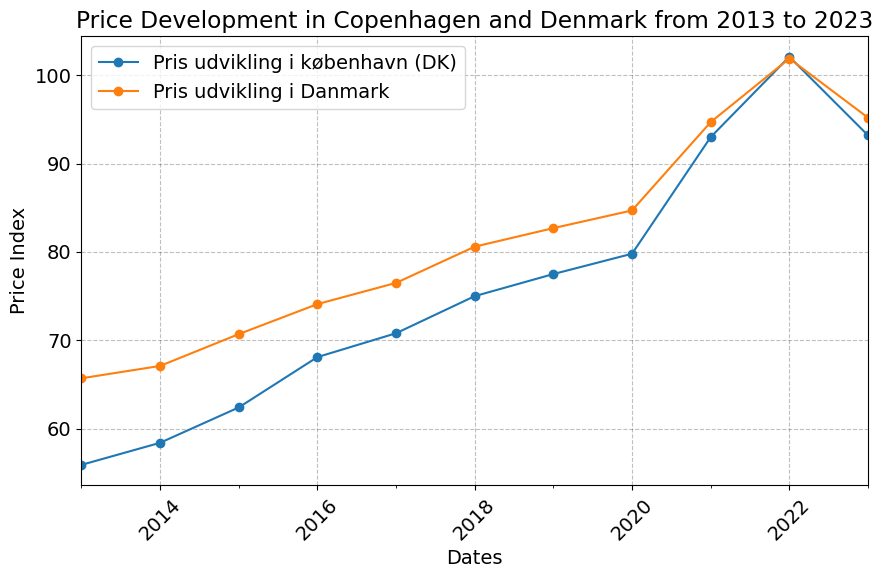

In [12]:
dates = ['2013K1', '2014K1', '2015K1', '2016K1', '2017K1', '2018K1', '2019K1', '2020K1', '2021K1', '2022K1', '2023K1']
# Convert 'K1' to '-Q1' for pandas to understand it as the first quarter
dates = [d.replace('K', '-Q') for d in dates]


kobenhavn_values = [55.9, 58.4, 62.4 , 68.1, 70.8, 75.0, 77.5, 79.8, 93.0, 102.1, 93.2]
Danmark_values = [65.7, 67.1, 70.7, 74.1, 76.5, 80.6, 82.7, 84.7, 94.7, 101.9, 95.2]

# Creating a pandas DataFrame
udvikling = pd.DataFrame({
    'Pris udvikling i københavn (DK)': kobenhavn_values,
    'Pris udvikling i Danmark': Danmark_values
}, index=pd.to_datetime(dates))

# Plotting
fig, ax = plt.subplots(figsize=(9, 6))
udvikling.plot(ax=ax, legend=True, marker='o')

ax.legend(frameon=True)
ax.set_xlabel('Dates')
ax.set_ylabel('Price Index')
ax.set_title('Price Development in Copenhagen and Denmark from 2013 to 2023')
ax.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()